In [1]:
%matplotlib inline

import numpy as np

from __future__ import division,print_function

import os, json
from glob import glob
import numpy as np
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt

In [2]:
import utils; reload(utils)
from utils import plots

Using TensorFlow backend.


In [34]:
from utils import *

In [4]:
import vgg16; reload(vgg16)
from vgg16 import Vgg16

## Steps

1. Oraganize folders for data and push data into it
2. Use the vgg model with finetuning
3. Run mutliple epochs - See how the accuracy improves
4. Write the code from scratch in keras
5. Check if it is over fitting or under fitting - If underfitting, finetune 2 more layers
6. After overfitting, try data augmentation, batch normalization and drop out

### Organize folders and data

In [66]:
import os,sys,shutil
%cd /Users/anuragchilukuri/Documents/CatsDogs
current_dir = os.getcwd()
LESSON_HOME_DIR = current_dir
DATA_HOME_DIR = current_dir+"/data/redux"

/Users/anuragchilukuri/Documents/CatsDogs


In [45]:
from utils import *

Using TensorFlow backend.


In [45]:
%cd $DATA_HOME_DIR

/Users/anuragchilukuri/Documents/CatsDogs/data/redux


In [88]:
%mkdir valid
%mkdir results
%mkdir -p sample/train
%mkdir -p sample/test/unknown
%mkdir -p sample/valid
%mkdir -p sample/results
%mkdir -p test/unknown

In [102]:
g = glob('*.jpg')
shuf = np.random.permutation(g)
for i in range(2000): os.rename(shuf[i],DATA_HOME_DIR+'/valid/'+shuf[i])

In [104]:
g = glob('*.jpg')
shuf = np.random.permutation(g)
for i in range(200): shutil.copyfile(shuf[i], DATA_HOME_DIR+'/sample/train/' + shuf[i])

In [105]:
g = glob('*.jpg')
shuf = np.random.permutation(g)
for i in range(50): shutil.copyfile(shuf[i],DATA_HOME_DIR+'/sample/valid/'+shuf[i])

In [44]:
%cd test/unknown

g=glob('*.jpg')
shuf = np.random.permutation(g)
for i in range(50):shutil.copyfile(shuf[i],DATA_HOME_DIR+'/sample/test/unknown/'+shuf[i])

/Users/anuragchilukuri/Documents/CatsDogs/data/redux/test/unknown


In [115]:
%cd $DATA_HOME_DIR/sample/train
%mkdir cats
%mkdir dogs
%mv cat.*.jpg cats
%mv dog.*.jpg dogs

%cd $DATA_HOME_DIR/sample/valid
%mkdir cats
%mkdir dogs
%mv cat.*.jpg cats
%mv dog.*.jpg dogs/

%cd $DATA_HOME_DIR/train
%mkdir cats
%mkdir dogs
%mv cat.*.jpg cats
%mv dog.*.jpg dogs

%cd $DATA_HOME_DIR/valid
%mkdir cats
%mkdir dogs
%mv cat.*.jpg cats
%mv dog.*.jpg dogs

/Users/anuragchilukuri/Documents/CatsDogs/data/redux/sample/train
/Users/anuragchilukuri/Documents/CatsDogs/data/redux/sample/valid


In [118]:
%cd $DATA_HOME_DIR/test
%mkdir unknown
%mv *.jpg unknown

/Users/anuragchilukuri/Documents/CatsDogs/data/redux/test


### Finetuning vgg

In [6]:
%cd $DATA_HOME_DIR

/Users/anuragchilukuri/Documents/CatsDogs/data/redux


In [7]:
path = DATA_HOME_DIR + '/sample/'
train_path = path + 'train/'
test_path = path + 'test/'
valid_path = path +'valid/'
results_path = path +'results/'

In [8]:
batch_size=16
vgg = Vgg16()

In [9]:
batches = vgg.get_batches(train_path,batch_size=batch_size)
val_batches = vgg.get_batches(valid_path,batch_size=batch_size)
vgg.finetune(batches)

Found 200 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [10]:
vgg.model.optimizer.lr = 0.01

In [11]:
no_of_epochs=3

In [12]:
latest_weights_filename = None
for epoch in range(no_of_epochs):
    #print "Running epoch: %d" % epoch
    vgg.fit(batches,val_batches,nb_epoch=1)
    latest_weights_filename = "ft%d.h5" % epoch
    vgg.model.save_weights(results_path+latest_weights_filename)
print("Completed %s epoch runs" % (epoch+1))

Epoch 1/1
200/200 [==============================] - 227s - loss: 1.5185 - acc: 0.7600 - val_loss: 0.6862 - val_acc: 0.8800
Epoch 1/1
200/200 [==============================] - 221s - loss: 0.8775 - acc: 0.8900 - val_loss: 0.6874 - val_acc: 0.8400
Epoch 1/1
200/200 [==============================] - 221s - loss: 0.8464 - acc: 0.9150 - val_loss: 0.9973 - val_acc: 0.8400
Completed 3 epoch runs


In [49]:
batches,preds = vgg.test(test_path,batch_size=batch_size)

Found 50 images belonging to 1 classes.


In [73]:
print(preds[:5])

[[  3.0859e-13   1.0000e+00]
 [  8.0033e-21   1.0000e+00]
 [  1.0000e+00   1.6507e-35]
 [  0.0000e+00   1.0000e+00]
 [  1.0000e+00   0.0000e+00]]


In [74]:
filenames = batches.filenames

In [75]:
print(filenames[:5])

['unknown/10156.jpg', 'unknown/1018.jpg', 'unknown/10266.jpg', 'unknown/10447.jpg', 'unknown/10482.jpg']


In [76]:
from PIL import Image

In [78]:
for i in filenames[:5]:
    Image.open(test_path+i)

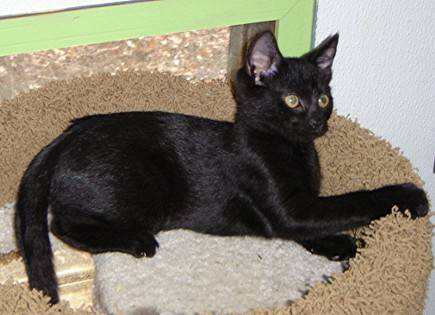

In [84]:
Image.open(test_path+'unknown/10156.jpg')

In [13]:
val_batches,preds = vgg.test(valid_path,batch_size=batch_size)

Found 50 images belonging to 2 classes.


In [14]:
our_predictions = preds[:,0]

In [15]:
from keras.preprocessing import image
def plots_idx(idx,titles=None):
    plots([image.load_img(valid_path+val_filenames[idx]) for i in idx],titles=titles)

In [16]:
n_view = 4

In [17]:
expected_labels = val_batches.classes

In [18]:
expected_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [19]:
our_labels = np.round(1-preds[:,0])

In [20]:
val_filenames = val_batches.filenames

In [21]:
correct = np.where(our_labels==expected_labels)[0]
print("The number of correct labels is %d " % len(correct))

The number of correct labels is 42 


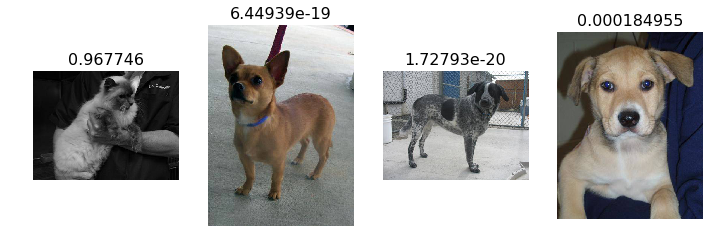

In [22]:
idx = np.random.permutation(correct)[:n_view]
plots([image.load_img(valid_path + val_filenames[i]) for i in idx],titles=our_predictions[idx])

In [23]:
wrong = np.where(our_labels!=expected_labels)[0]
print("The number of wrong labels is %d" %len(wrong))

The number of wrong labels is 8


Found 16 correct cats


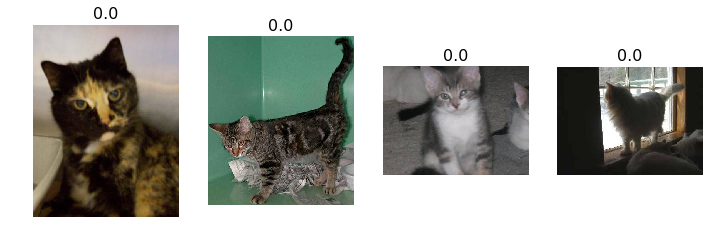

In [25]:
correct_cats = np.where((our_labels==0)&(our_labels==expected_labels))[0]
idx = np.random.permutation(correct_cats)[:n_view]
plots([image.load_img(valid_path + val_filenames[i]) for i in idx],titles=our_labels[idx])
print("Found %d correct cats" % len(correct_cats))

Found 7 incorrect cats


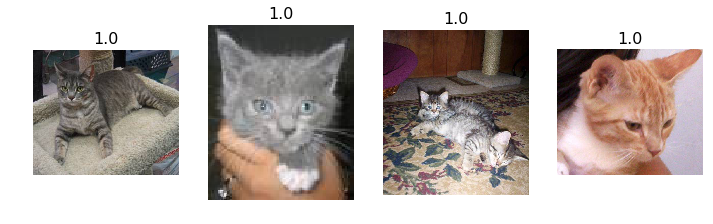

In [26]:
incorrect_cats = np.where((our_labels==1)&(our_labels!=expected_labels))[0]
idx = np.random.permutation(incorrect_cats)[:n_view]
plots([image.load_img(valid_path + val_filenames[i]) for i in idx],titles=our_labels[idx])
print("Found %d incorrect cats" % len(incorrect_cats))

Found 26 correct dogs


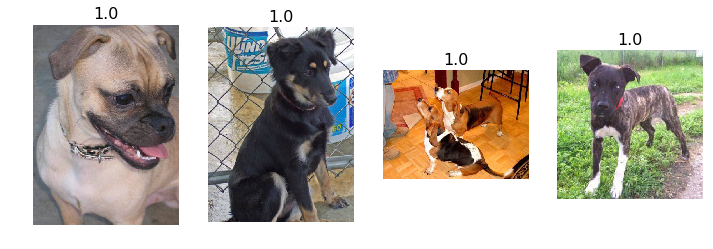

In [27]:
correct_dogs = np.where((our_labels==1)&(our_labels==expected_labels))[0]
idx = np.random.permutation(correct_dogs)[:n_view]
plots([image.load_img(valid_path + val_filenames[i]) for i in idx],titles=our_labels[idx])
print("Found %d correct dogs" % len(correct_dogs))

Found 1 incorrect dogs


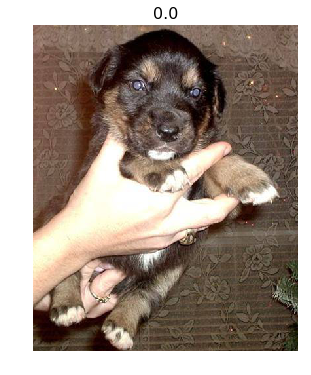

In [29]:
incorrect_dogs = np.where((our_labels==0)&(our_labels!=expected_labels))[0]
idx = np.random.permutation(incorrect_dogs)[:n_view]
plots([image.load_img(valid_path + val_filenames[i]) for i in idx],titles=our_labels[idx])
print("Found %d incorrect dogs" % len(incorrect_dogs))

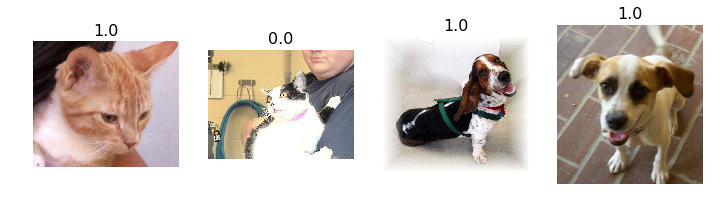

In [30]:
uncertain = np.argsort(abs(our_predictions-0.5))
idx = np.random.permutation(uncertain)[:n_view]
plots([image.load_img(valid_path + val_filenames[i]) for i in idx],titles=our_labels[idx])

In [31]:
from sklearn.metrics import confusion_matrix

[[16  7]
 [ 1 26]]


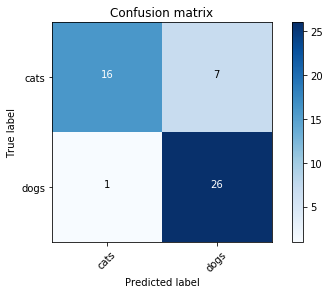

In [35]:
cm = confusion_matrix(expected_labels,our_labels)
plot_confusion_matrix(cm,val_batches.class_indices)

### Submit to Kaggle

In [37]:
labels = preds[:,1]

In [52]:
filenames = batches.filenames

In [43]:
def get_filename(x):
    return int(x[x.find("/")+1:x.find(".")])

In [55]:
filenumber = [get_filename(x) for x in filenames]

In [61]:
subm = np.stack([filenumber,labels],axis=1)

In [67]:
%cd $DATA_HOME_DIR
submission_file_name = "submission.csv"
np.savetxt(submission_file_name,subm,fmt="%d,%0.5f",header='id,label',comments='')

/Users/anuragchilukuri/Documents/CatsDogs/data/redux


In [73]:
from IPython.display import FileLink
FileLink("/Users/anuragchilukuri/Documents/CatsDogs/data/redux/submission.csv")

/Users/anuragchilukuri/Documents/CatsDogs/data/redux/submission.csv